# Support vector machine

## Introduction 

In this notebook we explore the support vector machine (SVM) algorithm. This is a supervised learning classification algorithm. For the sake of simplicity, we focus on the binary classification task; for multiple classes classification, one may perform a one-vs-rest or one-vs-one reduction. We start with the case of linearly separable datasets, in which case the main idea is to find the hyperplane that maximizes the margin (distance) to both classes. For non-linearly sepparable datasets, we allow points to cross the decision boundary up to a certain margin (in this case we say that the classificator has a *soft margin*). Finally, we can also use non-linear decision boundaries by making use of the kernel trick, which relies on the idea of implicit feature augmentation.

## The model: linearly separable case

Suppose we have a dataset $S = \{(x^1,y^1),\dots,(x^m,y^m) \}\subset \mathbb{R}^n\times\{-1,1\}$ consisting of pairs (features,class). Denote by $w$ the normal vector to the separating hyperplane $H$ and $a$ a position vector of such hyperplane. Then the points $z$ belonging to $H$ satisfy the equation

$$
w\cdot(z-a) = w\cdot z  - w\cdot a = 0 .
$$

Here $\cdot$ denotes the (Euclidian) inner product and we write $b = -w\cdot a$. Suppose that $w$ is a unit vector. The hyperplane separates $\mathbb{R}^n$ in three regions: $R_1 = \{ x : w\cdot x + b >0 \}$, $R_2 = \{ x : w\cdot x + b < 0 \}$ and $H$. In order for $H$ to be a separating hyperplane for our dataset, it is necessary that $x^j\in R_1$ for all $j$ such that $y^j =1$ and $x^k \in R_2$ for all $k$ such that $y^k = -1$ (or vice versa). This condition can be summarized by

$$
y^j(w\cdot x^j + b) > 0
$$

for all $j$. Assume now that $H$ is a separating plane for our dataset. Then the distance between a point $x^j$ and the hyperplane $H$ is given by 

$$
d(x^j,H) = |(x^j-a)\cdot w| = |x^j\cdot w + b| = y^j(w\cdot x^j + b).
$$

If we want to maximize the size of the margin, then we want to find the parameters $w,b$ for the hyperplane $H$ such that $\min_j d(x^j,H)= \min_j  y^j(w\cdot x^j + b)$ is maximal. In other words, we want to solve the optimization problem

$$
\begin{align*}
\max_{w,b} &\ M\\
\text{subject to } &y^j(w\cdot x^j + b) \geq M \text{ for all } j, \\
& \| w \| = 1.
\end{align*}
$$

We can remove the constraint $\|w\| = 1$ by normalizing the distance by the norm of $w$. That is, the above problem is equivalent to 

$$
\begin{align*}
\max_{w,b} &\ M/\| w\| \\
\text{subject to } &y^j(w\cdot x^j + b) > M \text{ for all } j. \\
\end{align*}
$$
If we perform the coordinates transformation $w,b \mapsto w/M ,b /M$, then we get the equivalent optimization problem:

$$
\begin{align*}
\max_{w,b}\ &\|w\|^{-1}\\
\text{subject to } &y^j(w\cdot x^j + b) > 1 \text{ for all } j. \\
\end{align*}
$$

This is now equivalent to the convex minimization problem

$$
\begin{align*}
\min_{w,b}\ &\dfrac{1}{2}\|w\|^2\\
\text{subject to } &y^j(w\cdot x^j + b) > 1 \text{ for all } j. \\
\end{align*}
$$

with linear constraints.

## Lagrangian form

The previous minimization problem can be formulated in its dual form by considering the lagrangian

$$
\mathcal L (w,b,\alpha) = -(\dfrac{1}{2}\|w\|^2 - \sum_{i=1}^m \alpha_i (y^i(w\cdot x^i + b) - 1 ))
$$

for $\alpha_i \geq 0$. Solving the original (primal) problem, is equivalent to the minimization of the Lagrangiagian subject to the [Karush-Kuhn-Tucker conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions). These conditions can be written as 

$$
\begin{align*}
\nabla_w \mathcal{L} &= 0 , \\
\nabla_b \mathcal{L} &= 0, \\
\alpha_i & \geq 0, \\
\alpha_i (y^i(w\cdot x^i + b) - 1 ) & = 0.
\end{align*}
$$

for all $i$. The first two conditions can be written as

$$
\begin{align*}
\nabla_w \mathcal{L} =  -(w - \sum_{i=1}^m \alpha_i y^i x^i &)=   0, \\
\nabla_b \mathcal{L} =   -\sum_{i=1}^m \alpha_i y^i &=   0 .
\end{align*}
$$

With this conditions, the lagrangian can be reduced to

$$
\begin{align*}
\mathcal L (w,b,\alpha) &= -(\dfrac{1}{2}\|w\|^2 - \sum_{i=1}^m \alpha_i (y^i(w\cdot x^i + b) - 1 )) \\
&= -(\dfrac{1}{2}w\cdot w - \sum_{i=1}^m  (\alpha_i y^i w\cdot x^i + \alpha_i y^i b - \alpha_i )) \\
&= -(\dfrac{1}{2} \sum_{i,j=1}^m \alpha_i \alpha_ j y^i  y^j x^i\cdot x^j - \sum_{i,j=1}^m \alpha_i \alpha_ j y^i  y^j x^i\cdot x^j  + \sum_{i=1}^m \alpha_i )\\
&=-\sum_{i=1}^m \alpha_i + \dfrac{1}{2} \sum_{i,j=1}^m \alpha_i \alpha_ j y^i  y^j x^i\cdot x^j
\end{align*}
$$

This is a quadatic problem that can be solved using the usual optimization tools. We proceed to implement the algorithm. Once the optimization is solved, for a new observation $x$, we can predict its class by

$$
\widehat y = \mathrm{sign}(w\cdot x + b).
$$

For this, we need the values of $w$ and $b$ as a function of the training data and the parameters $\alpha_i$. An expression for $w$ follows directly from the KKT conditions. For $b$, we can get a condition by subtracting the equation $(y^i(w\cdot x^i + b) - 1 )  = 0$ for two indices $i,j$  such that $\alpha_s,\alpha_t >0$ and $y^s = 1$, $y^t=-1$, and then solving for $b$. Thus we obtain

$$
\begin{align*}
w &= \sum_{i=1}^m \alpha_i y^i x^i  ,\\
b &= -\dfrac{1}{2}w\cdot (x^s+x^t).
\end{align*}
$$

The vectors $x^i$ so that $\alpha_i > 0$ are called the **support vectors**, and the separating hyperplane is completely defined by them.

## Implementation

In this section we implement the algorithm described above. We start by implementing the usual scientific libraries. This time, we will use `scipy` minimizing tool:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

We generate two classes of points which are linearly separable. We fix a seed of random numbers so we always get the same dataset:

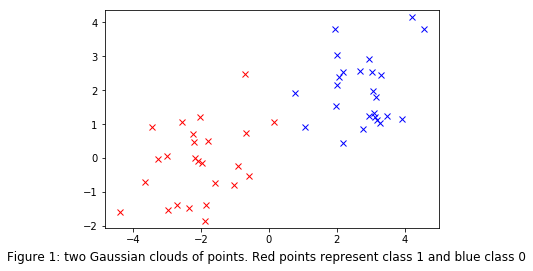

In [2]:
np.random.seed(6)
class_0 = 25 
class_1 = 25

x0 = np.random.multivariate_normal([-2, 0], [[1, .15],[.15, 1]], class_0)
x1 = np.random.multivariate_normal([3, 2], [[1, .25],[.25, 1]], class_1)

plt.plot(x0[:,0],x0[:,1],'x',color='red')
plt.plot(x1[:,0],x1[:,1],'x',color='blue')
plt.figtext(0.5, 0.01, 'Figure 1: two Gaussian clouds of points. Red points represent class 1 and blue class 0', 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.axis('equal')
plt.show()

y0 = -np.ones(len(x0))
y1 = np.ones(len(x1))

X_train =  np.vstack((x0,x1))
y_train = np.append(y0,y1)

We compute the matrix containing the inner products of the points of the dataset.

In [3]:
def inner_prods(X_train):
    return np.dot(X_train,X_train.T)

With this, we can write the cost function as:

In [4]:
def cost(alpha): 
    return -(np.sum(alpha) - (1/2)*np.dot(np.multiply(alpha,y_train),
                                        np.dot(inner_prods(X_train),np.multiply(alpha,y_train))))

We define the constraint given by the KKT conditions. This is of the form $\sum_{i=1}^m \alpha_i y^i = 0$.

In [5]:
def cons1(alpha):
    return np.dot(alpha,y_train)

cons = ({'type': 'eq', 'fun': cons1})

We also set the conditions for the Lagrange multipliers: $\alpha_i \geq 0$:

In [6]:
bds = [(0,None) for _ in range(len(X_train))]

Now, we need an initial guess for the value of $\alpha_i$ for the optimizer:

In [7]:
alpha = np.random.random(len(X_train))

Finally, we optimize the cost function 

In [8]:
res = minimize(cost, alpha , bounds=bds, constraints=cons)

We recover the values of $\alpha_i$ that optimize the Lagrangian:

In [9]:
alpha = res.x

We will set to zero the values $\alpha_i$ which are smaller than $10^{-7}$:

In [10]:
alpha = alpha*(1*(alpha > 10**(-7)))

We can now construct the parameters $w,b$:

In [11]:
w = 0
for i in range(len(X_train)):
    w += y_train[i]*alpha[i]*X_train[i,:]

b = (-1/2)* np.dot(w,X_train[((alpha > 0) & (y_train == 1))][0] + 
                   X_train[((alpha > 0) & (y_train == -1))][0] )

With this, we can build the prediction function:

In [12]:
def predict(x,w,b):
    return np.sign(np.dot(x,w)+b)

Finally, we can plot the decision boundary given by the SVM as well as the regions predicted for each class. We can see how the separating hyperplane maximizes the margin to both classes.

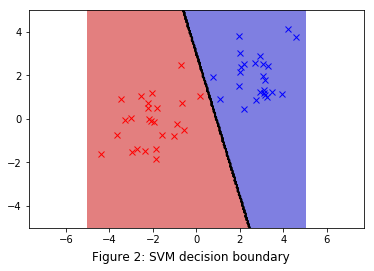

In [13]:
plt.plot(x0[:,0],x0[:,1],'x',color='red')
plt.plot(x1[:,0],x1[:,1],'x',color='blue')
plt.figtext(0.5, 0.01, 'Figure 2: SVM decision boundary', 
            wrap=True, horizontalalignment='center', fontsize=12)

x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
z = np.zeros(X.shape)
Z = np.array(z)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = predict(np.array([x[j],y[i]]).reshape(1,2),w,b)
plt.contourf(X, Y, Z, alpha=.5, cmap='jet_r')
C = plt.contour(X, Y, Z,  colors='black',zorder=4)
plt.axis('equal')
plt.show()

We can check the support vectors and plot them together with the separating hyperplane

In [14]:
sup_vect = X_train[alpha > 0]
sup_vect

array([[0.15695433, 1.0690201 ],
       [0.76728419, 1.90999537],
       [1.06908872, 0.91924923]])

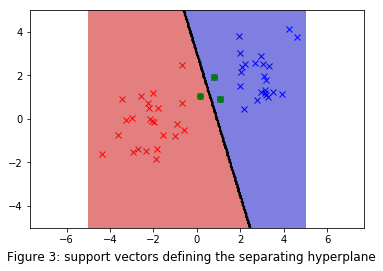

In [15]:
plt.plot(x0[:,0],x0[:,1],'x',color='red')
plt.plot(x1[:,0],x1[:,1],'x',color='blue')
plt.figtext(0.5, 0.01, 'Figure 3: support vectors defining the separating hyperplane', 
            wrap=True, horizontalalignment='center', fontsize=12)

x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z, alpha=.5, cmap='jet_r')
C = plt.contour(X, Y, Z,  colors='black',zorder=4)
plt.plot(sup_vect[:,0],sup_vect[:,1],'o',color='green')


plt.axis('equal')
plt.show()

## Final remarks

In this notebook we explored the most basic setup for a support vector machine. In the next notebooks, we will explore the non-linearly separable case as well as the usa of kernels for introducing non-linear decision boundaries.